In [1]:
import matplotlib.pyplot as plt
import numpy as np
from rubin_sim.data import get_data_dir
from rubin_sim.utils import LsstCameraFootprint

In [2]:
plt.rc('font', family='serif')
plt.rcParams['text.usetex'] = False
fs = 24

# update various fontsizes to match
params = {'figure.figsize': (12, 8),
          'legend.fontsize': fs,
          'axes.labelsize': fs,
          'xtick.labelsize': 0.6 * fs,
          'ytick.labelsize': 0.6 * fs,
          'axes.linewidth': 1.1,
          'xtick.major.size': 7,
          'xtick.minor.size': 4,
          'ytick.major.size': 7,
          'ytick.minor.size': 4}
plt.rcParams.update(params)

%config InlineBackend.figure_format = 'retina'

In [66]:
plt.style.use("dark_background")

In [131]:
pointing_ra = np.radians(165)
pointing_dec = np.radians(-70)
pointing_rot = np.radians(30)

In [90]:
import os

In [114]:
camera.camera_fov

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [109]:
%%timeit
camera = LsstCameraFootprint(units='degrees')

1.92 ms ± 160 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [140]:
radius = np.radians(2.1 + 0.1) / np.cos(pointing_dec)
stepsize = np.radians(0.003)
ra = np.arange(pointing_ra - radius, pointing_ra + radius, stepsize)
dec = np.arange(pointing_dec - radius, pointing_dec + radius, stepsize)
ra, dec = np.meshgrid(ra, dec)
ra = ra.flatten()
dec = dec.flatten()

In [141]:
idx = camera(ra, dec, pointing_ra, pointing_dec, pointing_rot)

In [142]:
in_circle = np.sqrt((ra - pointing_ra)**2 + (dec - pointing_dec)**2) <= np.radians(2.1)

In [143]:
f"Fraction not in circle: {len(ra[idx]) / len(ra[in_circle]):1.3f}"

'Fraction not in circle: 1.936'

In [144]:
def add_stars(ax, starsurfacedensity=0.8, lw=1):
    starcolor = (1.,1.,1.)
    area = np.sqrt(np.sum(np.square(ax.transAxes.transform([1.,1.]) - ax.transAxes.transform([0.,0.]))))*1
    nstars = int(starsurfacedensity*area)

    #small stars
    xy = np.random.uniform(size=(nstars,2))
    ax.scatter(xy[:,0],xy[:,1], transform=ax.transAxes, alpha=0.05, s=8*lw, facecolor=starcolor, edgecolor=None, zorder=3)
    ax.scatter(xy[:,0],xy[:,1], transform=ax.transAxes, alpha=0.1, s=4*lw, facecolor=starcolor, edgecolor=None, zorder=3)
    ax.scatter(xy[:,0],xy[:,1], transform=ax.transAxes, alpha=0.2, s=0.5*lw, facecolor=starcolor, edgecolor=None, zorder=3)

    #large stars
    xy = np.random.uniform(size=(nstars//4,2))
    ax.scatter(xy[:,0],xy[:,1], transform=ax.transAxes, alpha=0.1, s=15*lw, facecolor=starcolor, edgecolor=None, zorder=3)
    ax.scatter(xy[:,0],xy[:,1], transform=ax.transAxes, alpha=0.1, s=5*lw, facecolor=starcolor, edgecolor=None, zorder=3)
    ax.scatter(xy[:,0],xy[:,1], transform=ax.transAxes, alpha=0.5, s=2*lw, facecolor=starcolor, edgecolor=None, zorder=3)

In [147]:
from matplotlib.patches import Ellipse

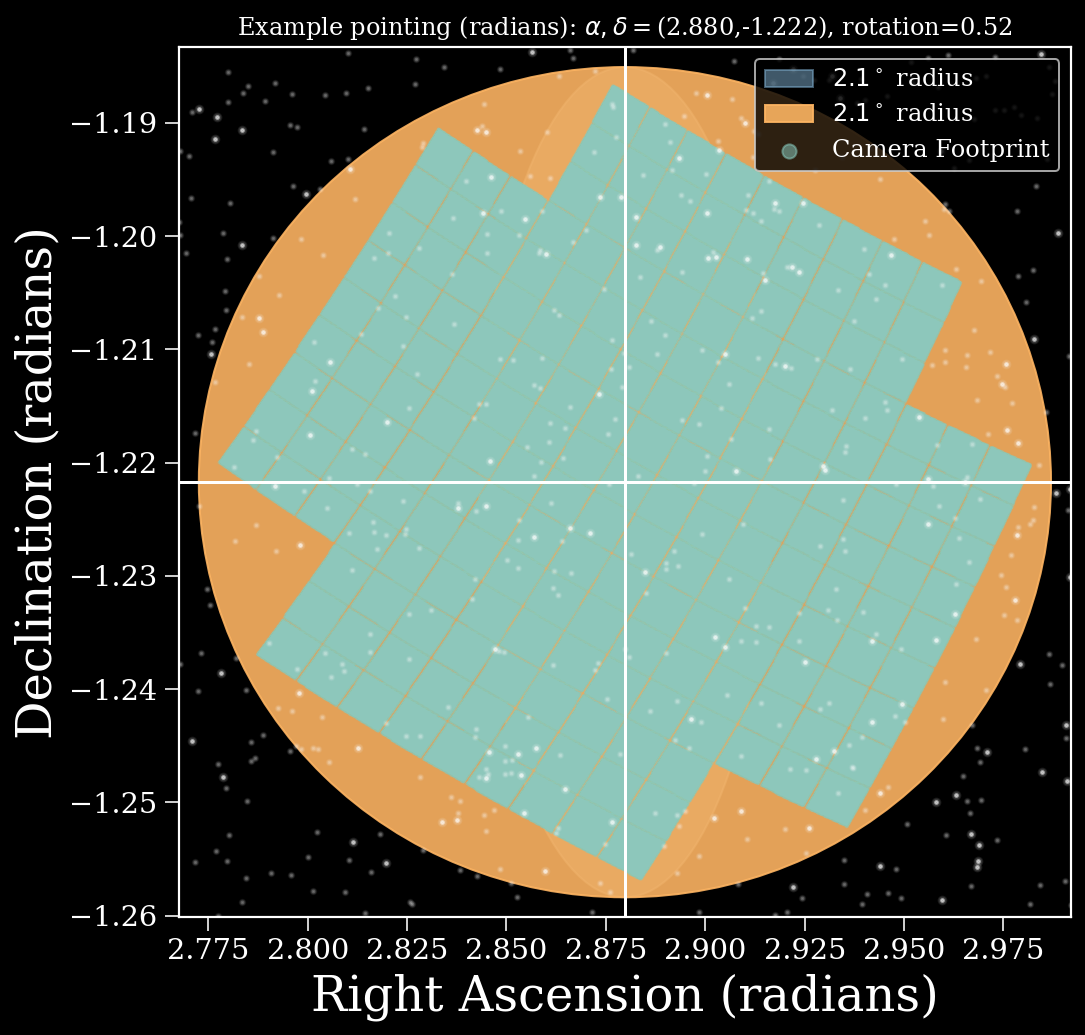

In [151]:
fig, ax = plt.subplots(figsize=(8,8))

radius = plt.Circle((pointing_ra, pointing_dec), np.radians(2.1),
                    color="C4", alpha=0.5, label=r"$2.1^\circ$ radius")
ax.add_artist(radius)

radius = Ellipse((pointing_ra, pointing_dec), width=2 * (np.radians(2.1) / np.cos(pointing_dec)), height=2*np.radians(2.1),
                    color="C5", alpha=0.9, label=r"$2.1^\circ$ radius")
ax.add_artist(radius)

ax.scatter(ra[idx], dec[idx], s=0.005, color="C0", alpha=0.5, label="Camera Footprint")

add_stars(ax)

# plt.title('FOV')
# plt.axis('square')
ax.set_xlabel('Right Ascension (radians)')
ax.set_ylabel('Declination (radians)')

ax.legend(loc="upper right", fontsize=0.5*fs, markerscale=100)

ax.set_title(r"Example pointing (radians): $\alpha, \delta = $" + f"({pointing_ra:1.3f},{pointing_dec:1.3f}), rotation={pointing_rot:1.2f}")

ax.axvline(pointing_ra)
ax.axhline(pointing_dec)

ax.set_xlim(pointing_ra - np.radians(2.2) / np.cos(pointing_dec), pointing_ra + np.radians(2.2) / np.cos(pointing_dec))
ax.set_ylim(pointing_dec - np.radians(2.2), pointing_dec + np.radians(2.2))

plt.show()

In [126]:
x = np.arange(1000)
y = np.arange(1000)
X, Y = np.meshgrid(x, y)
x, y= X.ravel(), Y.ravel()

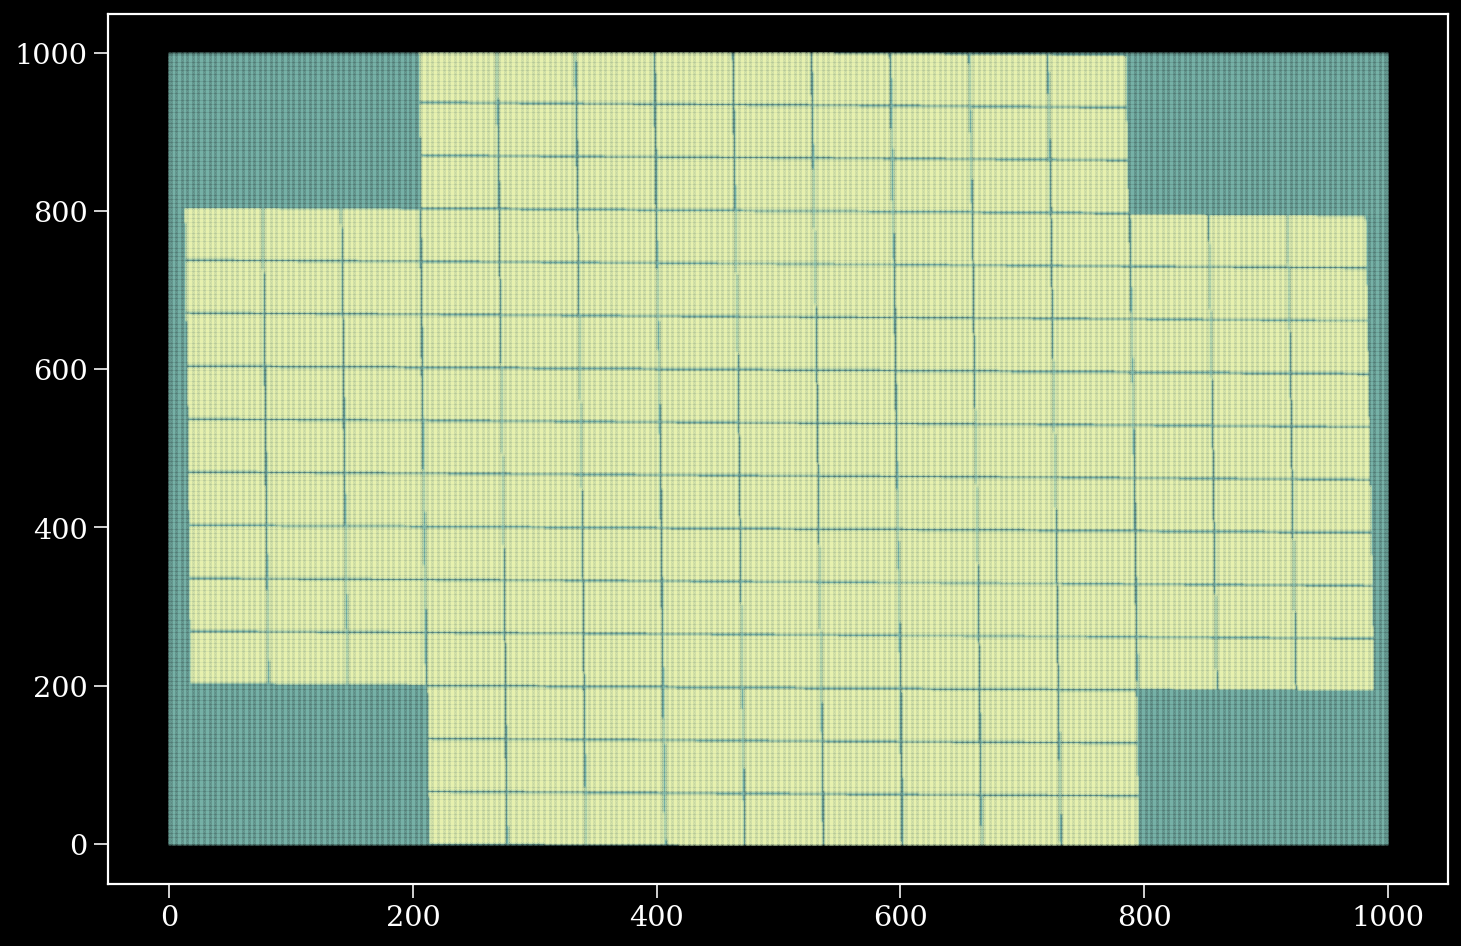

In [130]:
plt.scatter(x, y, s=0.01)
plt.scatter(x[camera.camera_fov.ravel()], y[camera.camera_fov.ravel()], s=0.01)